In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division

import os
import copy
import numpy as np

import scipy
from scipy.interpolate import interp1d

# Astropy
from astropy.io import fits
from astropy    import units as u
from astropy.stats import sigma_clip
# AstroML
from astroML.plotting import hist

# Matplotlib related
# Matplotlib default settings
rcdef = plt.rcParams.copy()
pylab.rcParams['figure.figsize'] = 12, 10
pylab.rcParams['xtick.major.size'] = 8.0
pylab.rcParams['xtick.major.width'] = 2.5
pylab.rcParams['xtick.minor.size'] = 4.0
pylab.rcParams['xtick.minor.width'] = 2.5
pylab.rcParams['ytick.major.size'] = 8.0
pylab.rcParams['ytick.major.width'] = 2.5
pylab.rcParams['ytick.minor.size'] = 4.0
pylab.rcParams['ytick.minor.width'] = 2.5

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import MaxNLocator

In [77]:
#cat = 'hsc_gama_galaxies_photodr12_gama.fits'
cat = 'hsc_gama_galaxies2.fits'
data = fits.open(cat)[1].data

In [78]:
sdssZ = data[data.specobjid > 0]
gamaZ = data[data.z_gama > 1E-5]
bothZ = data[(data.specobjid > 0) | (data.z_gama > 1E-5)]

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


(14.1, 19.9)

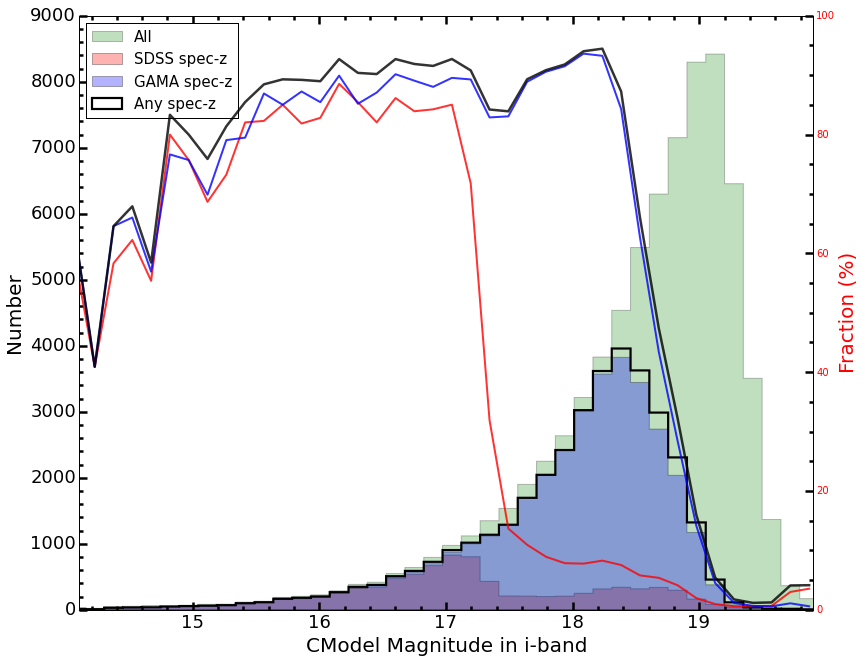

In [80]:
fig = plt.figure(figsize=(12, 11))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
ax1 = fig.add_subplot(111)

num2, bins2, patches2 = hist(sdssZ.cmodelMag_i, bins='knuth', ax=ax1,
                             color='r', histtype='stepfilled', normed=False,
                             range=(14.0, 20.0), alpha=0.30, label='SDSS spec-z')

num1, bins1, patches1 = hist(data.cmodelMag_i, bins=bins2, ax=ax1,
                             color='g', histtype='stepfilled', normed=False,
                             range=(14.0, 20.0), alpha=0.25, label='All')
binsCen1 = (bins1[0:-1] + bins1[1:])/2.0

sdssFrac = (num2 * 100.0 / num1)

num3, bins3, patches3 = hist(gamaZ.cmodelMag_i, bins=bins2, ax=ax1,
                             color='b', histtype='stepfilled', normed=False,
                             range=(14.0, 20.0), alpha=0.30, label='GAMA spec-z')
gamaFrac = (num3 * 100.0 / num1)

num4, bins4, patches4 = hist(bothZ.cmodelMag_i, bins=bins2, ax=ax1,
                             color='k', histtype='step', normed=False,
                             range=(14.0, 20.0), linewidth=2.2, label='Any spec-z')
bothFrac = (num4 * 100.0 / num1)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

handles, labels = ax1.get_legend_handles_labels()
ax1.legend((handles[1], handles[0], handles[2], handles[3]), 
           (labels[1], labels[0], labels[2], labels[3]), prop=dict(size=15), loc=2)

ax1.set_xlabel('CModel Magnitude in i-band', size=20)
ax1.set_ylabel('Number', size=20)

ax1.set_xlim(14.1, 19.9)

ax1.minorticks_on()

########

ax2 = ax1.twinx()
ax2.plot(binsCen1, sdssFrac, color='r', linewidth=2.0, alpha=0.8)
ax2.plot(binsCen1, gamaFrac, color='b', linewidth=2.0, alpha=0.8)
ax2.plot(binsCen1, bothFrac, color='k', linewidth=2.5, alpha=0.8)

ax2.set_ylabel('Fraction (%)', color='r', size=20)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(19) 
    
ax2.minorticks_on()
ax2.set_xlim(14.1, 19.9)